In [1]:
!pip install librosa

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt

import os
from PIL import Image
from pathlib import Path
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import tensorflow
import librosa.display


In [83]:
### Let's read a sample audio using librosa
import librosa
audio_file_path="C:\\Users\\Krishna\\Desktop\\Data\\genres_original\\pop\\pop.00008.wav"
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [84]:
print(librosa_audio_data)

[ 0.4713745   0.42648315  0.41140747 ...  0.03622437 -0.07781982
 -0.12097168]


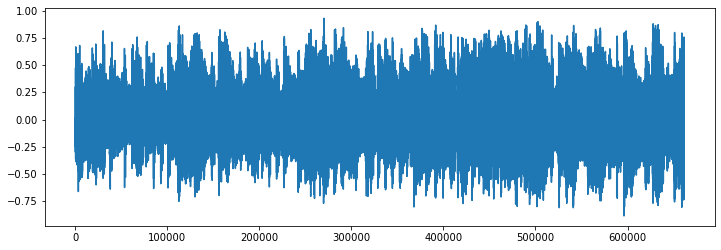

In [85]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [86]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [87]:
wave_audio

array([15446, 13975, 13481, ...,  1187, -2550, -3964], dtype=int16)

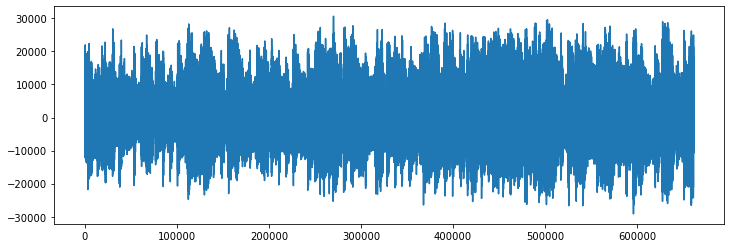

In [88]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [89]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 1293)


In [90]:
mfccs

array([[ -87.287094  , -107.493546  , -147.20073   , ...,    2.3420694 ,
           5.916076  ,  -17.794218  ],
       [ 109.457184  ,  112.407745  ,  112.40289   , ...,   72.64523   ,
          77.70216   ,   88.53114   ],
       [  41.413567  ,   70.694916  ,  100.77554   , ...,    2.8402522 ,
          -3.3972578 ,   -8.404283  ],
       ...,
       [  -2.8103182 ,    0.27582973,    2.4309506 , ...,   13.301128  ,
          13.27228   ,    9.517978  ],
       [  -1.3355885 ,   -3.8714726 ,   -4.5048113 , ...,  -10.768372  ,
         -11.339529  ,   -9.362686  ],
       [  -1.3285913 ,   -2.8428674 ,   -4.9601016 , ...,  -18.106073  ,
         -12.522352  ,   -6.8702393 ]], dtype=float32)

In [6]:
import numpy as np
dataset = []
genres = {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 
        'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}

for genre, genre_number in genres.items():
    for filename in os.listdir(f'C:\\Users\\Krishna\\Desktop\\Data\\genres_original\\{genre}'):
        songname = f'C:\\Users\\Krishna\\Desktop\\Data\\genres_original\\{genre}\\{filename}'
        for index in range(14):
            audio, sr = librosa.load(songname,res_type='kaiser_test')
            mfcc_fea = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
            mfcc_fea_ex=np.mean(mfcc_fea.T,axis=0)
            fea_class=genre
            dataset.append([mfcc_fea_ex,fea_class] )

In [7]:
import pandas as pd
extracted_features_df=pd.DataFrame(dataset,columns=['feature','class'])
extracted_features_df.head()


,feature,class
0,"[-113.59882, 121.57067, -19.162262, 42.36394, ...",blues
1,"[-113.59882, 121.57067, -19.162262, 42.36394, ...",blues
2,"[-113.59882, 121.57067, -19.162262, 42.36394, ...",blues
3,"[-113.59882, 121.57067, -19.162262, 42.36394, ...",blues
4,"[-113.59882, 121.57067, -19.162262, 42.36394, ...",blues


In [56]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [57]:
X.shape

(14000, 40)

In [58]:
y

array(['blues', 'blues', 'blues', ..., 'rock', 'rock', 'rock'],
      dtype='<U9')

In [59]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [60]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [61]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [62]:
X_train

array([[-193.1521    ,   89.18025   ,  -19.990849  , ...,   -0.90498585,
          -1.3640039 ,   -5.928955  ],
       [ -84.05484   ,   63.09341   ,    5.613019  , ...,   -1.0356138 ,
          -1.2826893 ,    0.74032533],
       [-201.1977    ,   76.78211   ,  -14.798453  , ...,   -2.1065578 ,
          -1.3161548 ,   -2.4045334 ],
       ...,
       [-125.878746  ,  126.59248   ,  -23.16423   , ...,   -1.461022  ,
          -5.207268  ,   -3.2916818 ],
       [ -52.5842    ,   37.492367  ,   14.0829    , ...,   -3.1213567 ,
          -2.875545  ,   -1.1666998 ],
       [-422.54468   ,   89.863014  ,  -18.732948  , ...,   -4.458441  ,
          -8.296608  ,   -2.824939  ]], dtype=float32)

In [63]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [64]:
X_train.shape

(11200, 40)

In [65]:
X_test.shape

(2800, 40)

In [66]:
y_train.shape

(11200, 10)

In [67]:
y_test.shape

(2800, 10)

In [68]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [70]:
### No of classes
num_labels=y.shape[1]

In [71]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [72]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               4100      
                                                                 
 activation_8 (Activation)   (None, 100)               0         
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 200)               20200     
                                                                 
 activation_9 (Activation)   (None, 200)               0         
                                                                 
 dropout_7 (Dropout)         (None, 200)               0         
                                                                 
 dense_10 (Dense)            (None, 100)              

In [73]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [74]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 200
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/200
348/350 [============================>.] - ETA: 0s - loss: 4.9466 - accuracy: 0.1511
Epoch 1: val_loss improved from inf to 2.11212, saving model to saved_models\audio_classification.hdf5
350/350 [==============================] - 1s 2ms/step - loss: 4.9320 - accuracy: 0.1515 - val_loss: 2.1121 - val_accuracy: 0.2896
Epoch 2/200
308/350 [=========================>....] - ETA: 0s - loss: 2.1405 - accuracy: 0.2340
Epoch 2: val_loss improved from 2.11212 to 1.83848, saving model to saved_models\audio_classification.hdf5
350/350 [==============================] - 1s 2ms/step - loss: 2.1265 - accuracy: 0.2372 - val_loss: 1.8385 - val_accuracy: 0.3982
Epoch 3/200
328/350 [===========================>..] - ETA: 0s - loss: 1.9327 - accuracy: 0.3110
Epoch 3: val_loss improved from 1.83848 to 1.69024, saving model to saved_models\audio_classification.hdf5
350/350 [==============================] - 1s 2ms/step - loss: 1.9295 - accuracy: 0.3120 - val_loss: 1.6902 - val_accuracy: 0.4439

In [76]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9714285731315613


In [77]:
X_test[1]

array([-29.299528  ,  53.877113  ,  -1.700412  ,  15.48996   ,
         1.0905542 ,   0.53732526,   4.8971496 ,  -3.2253232 ,
        -1.6960158 ,   2.227417  ,  -7.136839  ,  -5.9993052 ,
        -2.9869275 ,  -3.800679  ,  -4.8925123 ,  -6.728301  ,
        -0.42717907,  -4.024591  ,   4.3790174 ,   4.4642267 ,
         5.897736  ,   3.7864716 ,   3.130733  ,  -1.1859137 ,
         0.18943615,  -0.12405733,  -2.0700705 ,  -0.52642083,
        -0.6365078 ,  -0.40736425,  -0.5204842 ,  -3.82161   ,
        -5.7349544 ,  -0.7527156 ,   1.3588679 ,  -0.1029808 ,
         0.96322334,   2.294131  ,   1.3843558 ,  -0.23530917],
      dtype=float32)

In [78]:
y_pred=model.predict(X_test)

88/88 [==============================] - 0s 874us/step


In [79]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [80]:
y_pred

array([[8.20542567e-09, 5.58826496e-09, 1.89925436e-11, ...,
        1.99013812e-05, 5.11290864e-07, 1.00142217e-09],
       [0.00000000e+00, 2.01085406e-36, 0.00000000e+00, ...,
        1.00000000e+00, 8.53795526e-34, 0.00000000e+00],
       [8.10127147e-03, 8.29770215e-05, 3.49943846e-04, ...,
        1.59408504e-04, 3.66786087e-04, 7.78482258e-01],
       ...,
       [3.15948360e-04, 6.66833520e-02, 2.10050002e-05, ...,
        7.64956130e-05, 3.29777395e-04, 1.30446965e-03],
       [8.73953462e-01, 2.61827576e-04, 5.92371352e-09, ...,
        1.56360092e-09, 1.23802625e-01, 7.46280364e-07],
       [4.99847329e-06, 5.57705389e-05, 1.47005572e-08, ...,
        2.68736592e-04, 9.98748541e-01, 1.18146145e-05]], dtype=float32)

In [94]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [96]:
round_off=np.round_(y_pred)

In [97]:
round_off

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

Confusion Matrix
[[261   0   7   0   0   0   0   0   0   3]
 [  2 251   0   0   0   0   0   0   0   0]
 [ 11   0 262   0   0   0   0   0   0   0]
 [ 21   0   0 251   0   0   0   0   0   2]
 [  6   0   0   0 268   0   0   0   2   0]
 [ 13   0   0   0   0 282   0   0   1   0]
 [  3   0   0   0   0   0 272   0   0  16]
 [  0   0   3   0   0   0   0 294   0   0]
 [  9   0   0   0   0   0   0   0 287   0]
 [ 13   0   0   0   0   0   0   0   0 260]]


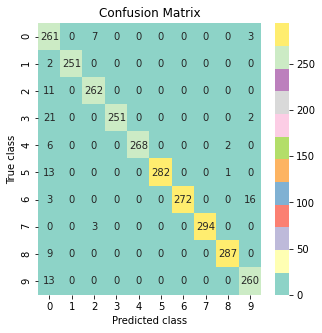

In [103]:
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
cm=confusion_matrix(y_test.argmax(axis=1),round_off.argmax(axis=1))
print("Confusion Matrix")
print(cm)

plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt="d",cmap='Set3')
plt.title("Confusion Matrix")
plt.ylabel("True class")
plt.xlabel("Predicted class")
plt.show()

In [93]:
filename="C:\\Users\\Krishna\\Desktop\\Data\\genres_original\\pop\\pop.00008.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict(mfccs_scaled_features)
print(predicted_label)
if predicted_label[0][0]==1.0:
    print('blues')
elif predicted_label[0][1]==1.0:
    print('classical')
elif predicted_label[0][2]==1.0:
    print('country')
elif predicted_label[0][3]==1.0:
    print('disco')
elif predicted_label[0][4]==1.0:
    print('hiphop')
elif predicted_label[0][5]==1.0:
    print('jazz')
elif predicted_label[0][6]==1.0:
    print('metal')
elif predicted_label[0][7]==1.0:
    print('pop')
elif predicted_label[0][8]==1.0:
    print('reggae')
elif predicted_label[0][9]==1.0:
    print('rock')

[-52.421513    74.03342     12.680926    24.495552    21.09758
   1.9039341    6.8095055    4.729847     8.409067     8.243973
  -2.2749782   -1.1975456   -2.679471     0.26266813  -1.0600877
  -0.83907866  -1.2490486   -2.3340123    3.812872     0.29528317
  -5.2179255    0.09247766   4.797655     0.20297153  -2.725558
  -2.2543724   -4.596182    -4.8950057    0.24640355  -3.3376021
  -2.9537911    1.02235      3.3528435    0.21099363  -1.1686491
  -1.0184283   -3.9671113   -4.8253393    0.9323926    3.2919037 ]
[[-52.421513    74.03342     12.680926    24.495552    21.09758
    1.9039341    6.8095055    4.729847     8.409067     8.243973
   -2.2749782   -1.1975456   -2.679471     0.26266813  -1.0600877
   -0.83907866  -1.2490486   -2.3340123    3.812872     0.29528317
   -5.2179255    0.09247766   4.797655     0.20297153  -2.725558
   -2.2543724   -4.596182    -4.8950057    0.24640355  -3.3376021
   -2.9537911    1.02235      3.3528435    0.21099363  -1.1686491
   -1.0184283   -3.967